In [4]:
import pandas as pd 
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt 
from io import StringIO 
from IPython.core.display import display, HTML
%matplotlib inline

In [5]:
# Sample Data
data = """ 
start,end,event,counts
2016-10-02 16:58:00,2016-10-02 16:59:00,700,181
2016-10-03 16:58:00,2016-10-03 16:59:00,600,281
2016-10-04 16:58:00,2016-10-04 16:59:00,610,191
2016-10-05 16:58:00,2016-10-05 16:59:00,920,244 
"""

In [6]:
df = pd.read_table(StringIO(data), sep=",")
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)
display(HTML(df.to_html()))

,start,end,event,counts
0,2016-10-02 16:58:00,2016-10-02 16:59:00,700,181
1,2016-10-03 16:58:00,2016-10-03 16:59:00,600,281
2,2016-10-04 16:58:00,2016-10-04 16:59:00,610,191
3,2016-10-05 16:58:00,2016-10-05 16:59:00,920,244


(1475427480000000000, 1475427540000000000)
(1475513880000000000, 1475513940000000000)
(1475600280000000000, 1475600340000000000)
(1475686680000000000, 1475686740000000000)


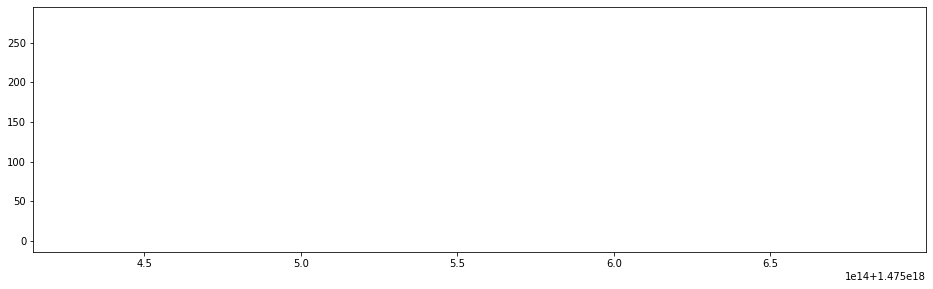

In [8]:
# Plot
fig = plt.figure(figsize=(16,4.5))
ax = fig.gca()

for index, r in df.iterrows():
    x = (r.start.value, r.end.value)
    print(x)
    h = r.counts 
    ax.fill_between(x, 0, h)

plt.show()

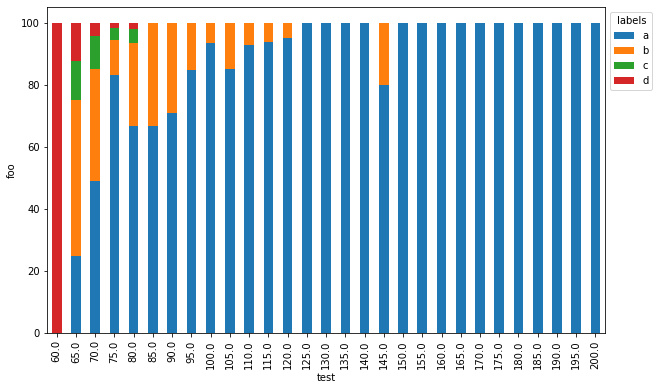

In [9]:
X_AXIS = ('60.0', '65.0', '70.0', '75.0', '80.0', '85.0', '90.0', '95.0', '100.0', '105.0', '110.0', '115.0', '120.0', '125.0', '130.0', '135.0', '140.0', '145.0', '150.0', '155.0', '160.0', '165.0', '170.0', '175.0', '180.0', '185.0', '190.0', '195.0', '200.0')

index = pd.Index(X_AXIS, name='test')

data = {'a': (0.0, 25.0, 48.94, 83.02, 66.67, 66.67, 70.97, 84.62, 93.33, 85.0, 92.86, 93.75, 95.0, 100.0, 100.0, 100.0, 100.0, 80.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0),
        'b': (0.0, 50.0, 36.17, 11.32, 26.67, 33.33, 29.03, 15.38, 6.67, 15.0, 7.14, 6.25, 5.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
        'c': (0.0, 12.5, 10.64, 3.77, 4.45, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
        'd': (100.0, 12.5, 4.26, 1.89, 2.22, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)}

df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('foo')
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
# plt.savefig('stacked.png')  # if needed
plt.show()

         counts              
category      A      B      C
start                        
2016-10   181.0  281.0    NaN
2016-11     NaN  191.0    NaN
2016-12     NaN    NaN  244.0


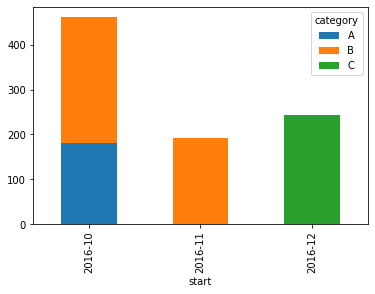

In [18]:
# Sample Data
data = """ 
start,end,category,counts
2016-10-02 16:58:00,2016-10-02 16:59:00,A,181
2016-10-03 16:58:00,2016-10-03 16:59:00,B,281
2016-11-04 16:58:00,2016-10-04 16:59:00,B,191
2016-12-05 16:58:00,2016-10-05 16:59:00,C,244 
"""
df = pd.read_table(StringIO(data), sep=",")
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)

group_by_month_per_categ = df.groupby(
    [
        df['start'].dt.strftime('%Y-%m'),
        'category'
    ]   
).mean().unstack()

print(group_by_month_per_categ)

group_by_month_per_categ['counts'].plot(kind='bar', stacked=True, legend=['category'])

plt.show()

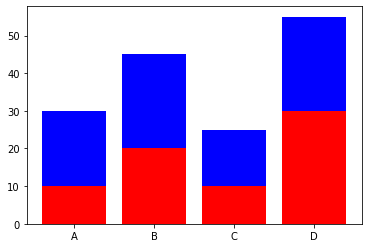

In [19]:
# create data
x = ['A', 'B', 'C', 'D']
y1 = [10, 20, 10, 30]
y2 = [20, 25, 15, 25]
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()